<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/housinganalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')

In [2]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:

data.info()

print(data['SalePrice'].describe())

print(data.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


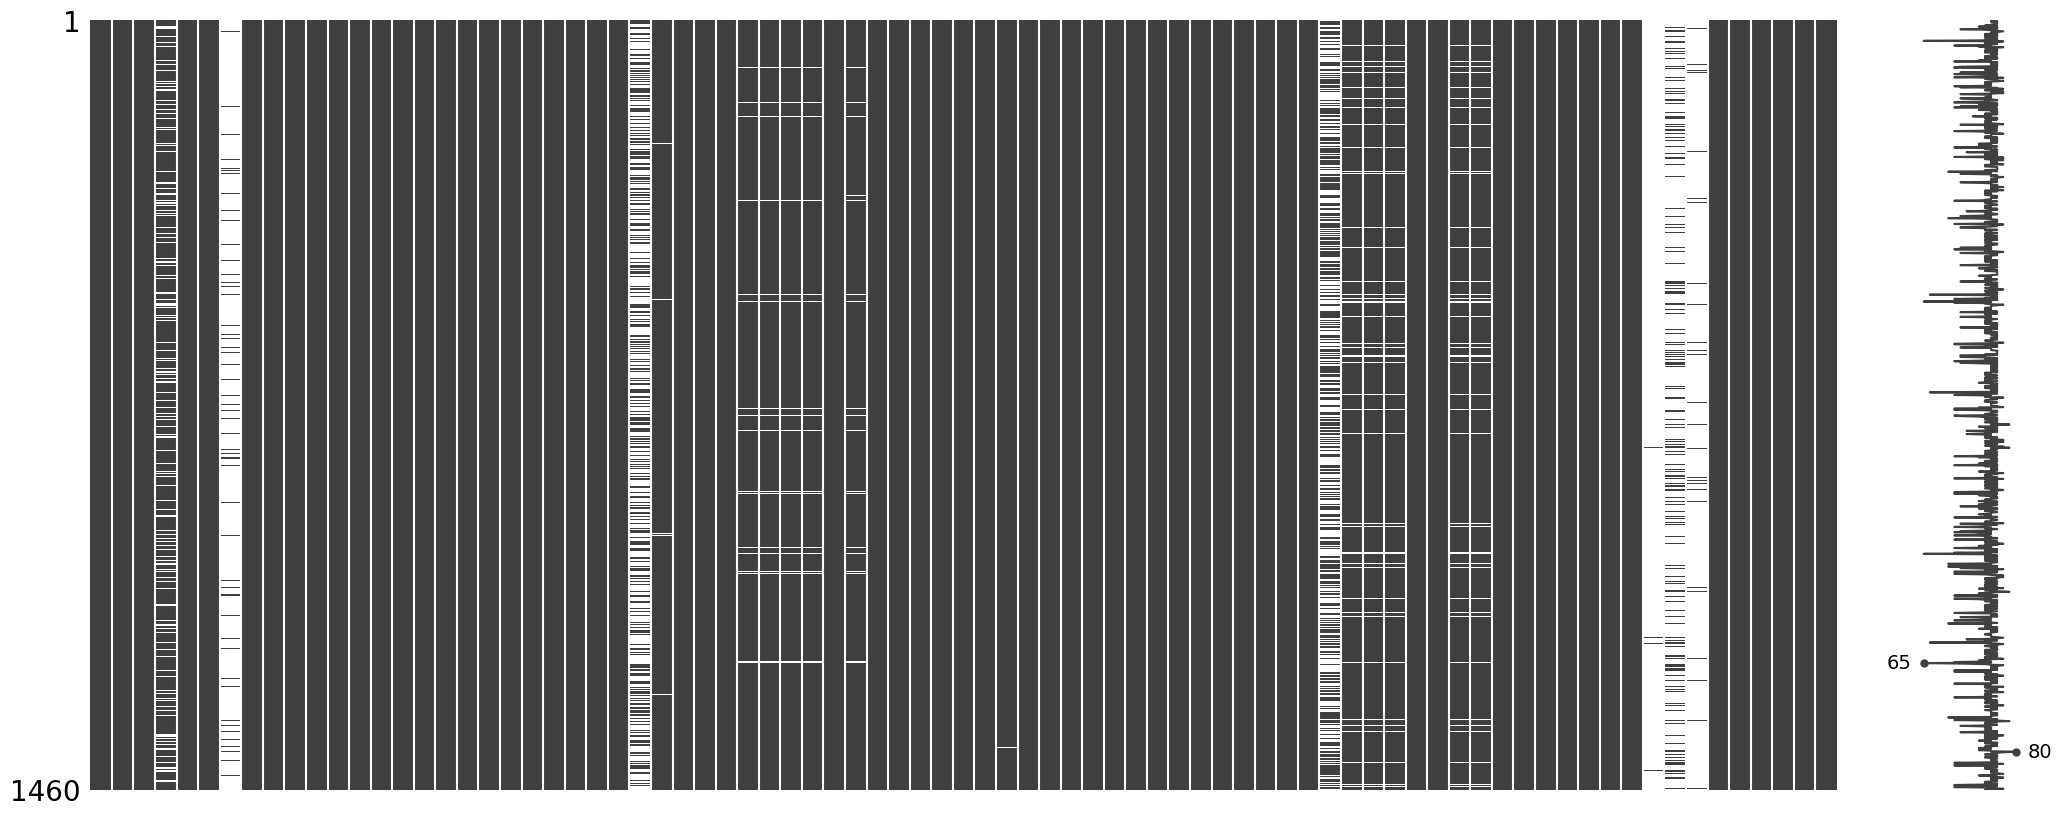

In [11]:
import missingno as msno

msno.matrix(data)

missing_ratio = data.isnull().sum() / len(data)
print(missing_ratio[missing_ratio > 0])

In [ ]:
# according to the internet,
# Skewness
# Definition:
# Skewness measures the degree of asymmetry or lack of symmetry in a distribution.

# Kurtosis
# Definition:
# Kurtosis measures the "tailedness" of a distribution, or how much the tails deviate from a normal distribution.

# Relationship
# Skewness and kurtosis are both used to describe the shape of a distribution.
# Skewness focuses on symmetry, while kurtosis focuses on the shape of the tails and peak.

kurtosis: 6.536281860064529, skewness: 1.8828757597682129
kurtosislog: 0.8095319958036296, skewnesslog: 0.12133506220520406


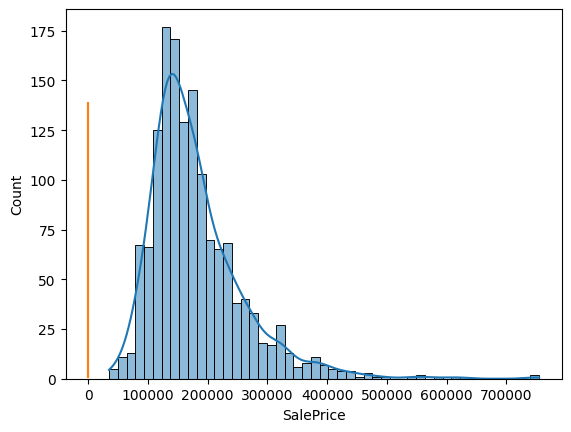

In [16]:
import seaborn as sns
import numpy as np

sns.histplot(data['SalePrice'], kde=True)

print(f"kurtosis: {data['SalePrice'].kurtosis()}, skewness: {data['SalePrice'].skew()}")

log_price = np.log(data['SalePrice'])

sns.histplot(log_price, kde=True)

print(f"kurtosislog: {log_price.kurtosis()}, skewnesslog: {log_price.skew()}")

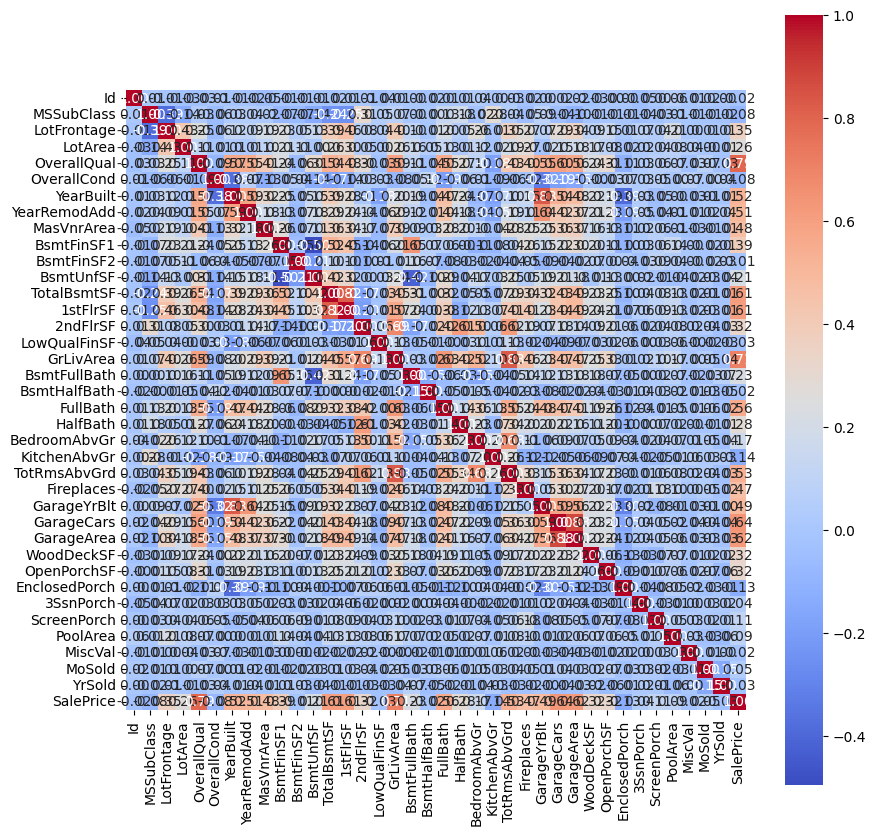

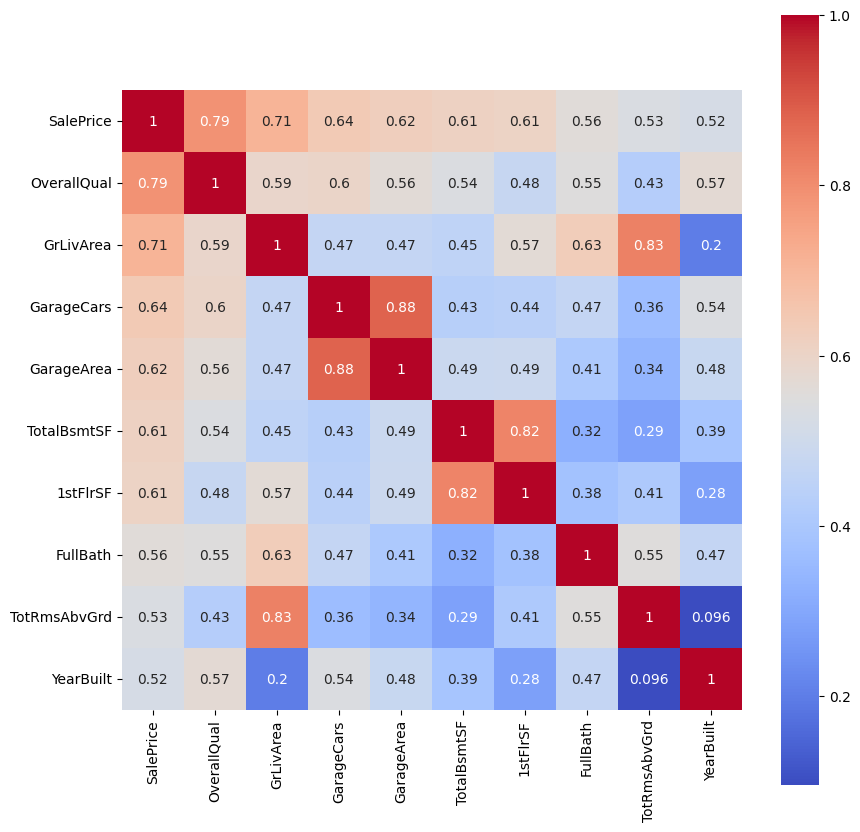

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_data = data.select_dtypes(include=['number'])

corr = numeric_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', square=True, annot=True, fmt=".2f")
plt.show()

top10_corr = corr.nlargest(10, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data[top10_corr].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()